In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import ease_of_live_scripts as es
from scipy import optimize as fit
from pprint import *
import seaborn as sbs


In [164]:
sbs.set()

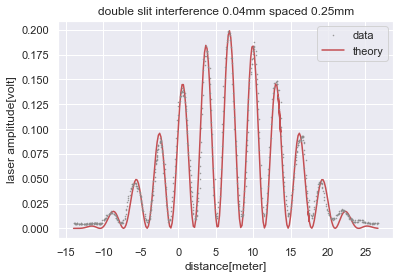

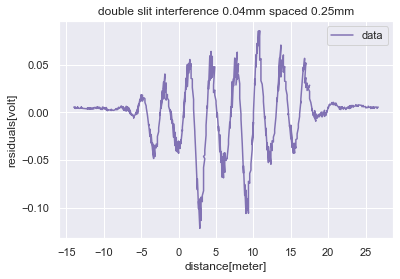

s:0.07330754476820947
p1:0.1520135379574369
p2:0.11588658561558296
offset:6.82277873063013
R^2:0.9478579439192316


In [165]:
def model_integrate(xdata,model,s,p1,p2,of):
    ydata=np.zeros(len(xdata))
    for i in range(len(xdata)):
        ydata[i]=np.sum(model(np.linspace(xdata[i]-s,xdata[i]+s),p1,p2,of))/50
    return ydata

def newmodel(x,s ,p1,p2,of):
    return model_integrate(x,es.double_slit_model,s,p1,p2,of)

pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=4.0e-5
L=25.0e-5
A=20
offset = es.offset+6.5
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))

data=es.read('exp1125/original parameters/double slit/0.04w 0.25s slit not centered symmeyricly','sweep1.txt')
r,c=[400,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s+0.01*s,np.inf,np.inf,np.inf)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,*popt),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,s, p1, p2 , offset),zorder=1,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))



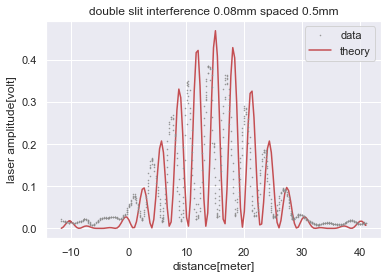

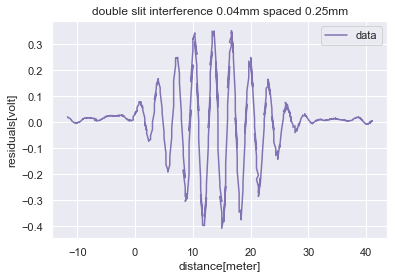

s:0.14661508953641894
p1:0.1500915955423928
p2:0.05856269969133533
offset:13.730616772497438
R^2:0.8503482796148996


In [179]:
pname=['s' ,'p1', 'p2', 'offset']
z=0.855
wl=(6.328*(10**(-7)))
d=8.0e-5
L=50.0e-5
A=10
offset = es.offset+15
s = (np.pi*L/(wl*z))*0.001*0.05
a = (np.pi*L/(wl*z))
p1=d/L
p2=wl*z/(4*A*(L**2))


data=es.read('exp1125/original parameters/double slit/0.08w 0.5s','sweep1.txt')
r,c=[400,1950]
xdata=z*np.tan(np.deg2rad((es.volt_to_angle(data['angle']))[int(c-r):int(c+r)]))
xdata2=(np.pi*L/(wl*z))*xdata
ydata=-data['power'][int(c-r):int(c+r)]
plt.plot(xdata2,ydata,'.',markersize=1,zorder=2,color=sbs.color_palette()[7])
popt, pcov=fit.curve_fit(newmodel,xdata2,ydata,[s, p1, p2 , offset],
                         bounds=((0,0      ,0     ,-np.inf),
                                 ( s+0.01*s,np.inf,np.inf,np.inf)))
plt.plot(xdata2,model_integrate(xdata2,es.double_slit_model,s, p1, p2 , offset),zorder=1,color=sbs.color_palette()[3])
plt.legend(['data','theory'])
plt.title('double slit interference 0.08mm spaced 0.5mm')
plt.xlabel('distance[meter]')
plt.ylabel('laser amplitude[volt]')
plt.show()
plt.plot(xdata2,ydata-model_integrate(xdata2,es.double_slit_model,s, p1, p2 , offset),zorder=1,color=sbs.color_palette()[4])
plt.legend(['data','theory'])
plt.title('double slit interference 0.04mm spaced 0.25mm')
plt.xlabel('distance[meter]')
plt.ylabel('residuals[volt]')
plt.show()
for i in range(len(popt)): print(pname[i]+':'+str(popt[i]))
print('R^2:'+str(es.Rsquared(xdata2,ydata,newmodel,popt)))